# Part I - (Fordgobike-TripData Data Exploration)
## by (Grace Wambui Ngugi)

## Introduction
The fordgobike data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

## Preliminary Wrangling


In [50]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [51]:
# load in the dataset into a pandas dataframe
df_bike= pd.read_csv('201902-fordgobike-tripdata.csv')
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [52]:
df_bike.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [53]:
#high overview of the dataset shape and type
print(df_bike.shape)
df_bike.dtypes

(183412, 16)


duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [54]:
#descriptive statistics for numerical variables
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [55]:
#Check for duplicate values
df_bike.duplicated().sum()

0

In [56]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB





### What is the structure of your dataset?

The forgobike dataset contains 183,412 rows and 16 columns. 

Most of the variables are numeric. 

The datatype summary for variables in this dataset is 
float64(7), int64(2), object(7)
### What is/are the main feature(s) of interest in your dataset?

The main features of interest in this dataset include

The trip duration (start time and end time)

The member gender and age. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Member gender

Member birth-year (age)

User-Type

Bike-share-for-all-trip

Duration-sec

**Cleaning the dataset**

In [57]:
#Making a copy of the dataset for cleaning 
df_clean = df_bike.copy() 

In [58]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [59]:
#Convert the start time and end time datatype from string to datatime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [60]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [61]:
# Extract the month, day and hour from start_time to form new columns 
df_clean['start_hour'] = df_clean.start_time.dt.hour
df_clean['start_day'] = df_clean.start_time.dt.day
df_clean['start_day_of_week'] = df_clean['start_time'].dt.day_name()
df_clean['end_day'] = df_clean.end_time.dt.day
df_clean['end_day_of_week'] = df_clean['end_time'].dt.day_name()
df_clean['end_hour'] = df_clean.end_time.dt.hour
df_clean['month'] = df_clean.start_time.dt.month_name()

df_clean.drop('end_time', axis=1, inplace=True)
df_clean.drop('start_time', axis=1, inplace=True)
# convert seconds to minutes
df_clean['duration_minutes'] = df_clean['duration_sec']/60

In [62]:
df_clean.sample(10)

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_gender,bike_share_for_all_trip,start_hour,start_day,start_day_of_week,end_day,end_day_of_week,end_hour,month,duration_minutes
39769,163,201.0,10th St at Fallon St,37.797673,-122.262997,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,4682,...,Male,No,3,23,Saturday,23,Saturday,3,February,2.716667
46192,606,321.0,5th St at Folsom,37.780146,-122.403071,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4569,...,Female,No,10,22,Friday,22,Friday,10,February,10.100000
129061,295,266.0,Parker St at Fulton St,37.862464,-122.264791,245.0,Downtown Berkeley BART,37.870139,-122.268422,76,...,Male,No,11,10,Sunday,10,Sunday,11,February,4.916667
130613,696,249.0,Russell St at College Ave,37.858473,-122.253253,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,5511,...,Female,No,16,9,Saturday,9,Saturday,16,February,11.600000
118729,752,187.0,Jack London Square,37.796248,-122.279352,178.0,Broadway at 30th St,37.819381,-122.261928,5111,...,Male,No,18,11,Monday,11,Monday,18,February,12.533333
10590,263,89.0,Division St at Potrero Ave,37.769218,-122.407646,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5727,...,NaN,No,20,27,Wednesday,27,Wednesday,20,February,4.383333
177594,227,201.0,10th St at Fallon St,37.797673,-122.262997,200.0,2nd Ave at E 18th St,37.800214,-122.253810,4909,...,Female,No,20,1,Friday,1,Friday,20,February,3.783333
61773,657,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,25.0,Howard St at 2nd St,37.787522,-122.397405,6121,...,Male,No,17,20,Wednesday,20,Wednesday,17,February,10.950000
54956,1774,131.0,22nd St at Dolores St,37.755000,-122.425728,9.0,Broadway at Battery St,37.798572,-122.400869,6149,...,Male,No,11,21,Thursday,21,Thursday,11,February,29.566667
154071,416,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,114.0,Rhode Island St at 17th St,37.764478,-122.402570,2619,...,Male,No,10,6,Wednesday,6,Wednesday,10,February,6.933333


In [63]:
#Drop unwanted columns 
df_clean.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

# test that column drop is successful
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               183412 non-null int64
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
start_hour                 183412 non-null int64
start_day                  183412 non-null int64
start_day_of_week          183412 non-null object
end_day                    183412 non-null int64
end_day_of_week            183412 non-null object
end_hour                   183412 non-null int64
month                      183412 non-null object
duration_minutes           183412 non-null

In [64]:
#Missing values
df_clean.isnull().sum()

duration_sec                  0
start_station_id            197
start_station_name          197
end_station_id              197
end_station_name            197
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_hour                    0
start_day                     0
start_day_of_week             0
end_day                       0
end_day_of_week               0
end_hour                      0
month                         0
duration_minutes              0
dtype: int64

In [65]:
df_clean.dropna(inplace=True)
df_clean.isnull().sum()

duration_sec               0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_hour                 0
start_day                  0
start_day_of_week          0
end_day                    0
end_day_of_week            0
end_hour                   0
month                      0
duration_minutes           0
dtype: int64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### 1. What is the gender distribution?

Text(0,0.5,'Number of Users')

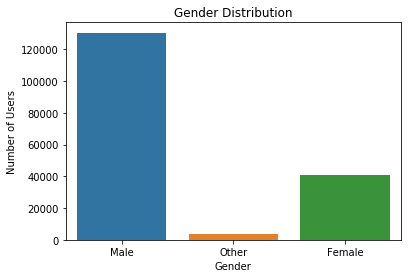

In [83]:
# barplot of gender usage
sb.countplot(data = df_clean, x = 'member_gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Users')

Males use the bikes more as compared to females and other gender. Over 120000 users are males. 

### 2. Checking the distribution of the trip duration in seconds. 

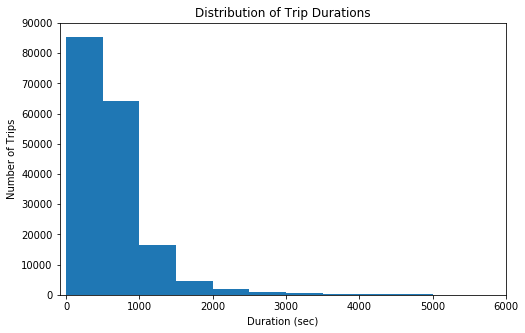

In [67]:

bins = np.arange(0, df_clean['duration_sec'].max()+500, 500)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.axis([-90, 6000, 0, 90000])
plt.show()

The longest trip duration is 5000 seconds. Most trip durations lie below 2000 seconds. 

### 3. What is the distribution of the users ages?

In [68]:
df = df_clean.groupby('member_birth_year').count()
df.tail()

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,start_hour,start_day,start_day_of_week,end_day,end_day_of_week,end_hour,month,duration_minutes
member_birth_year,,,,,,,,,,,,,,,,,
1997.0,3476,3476,3476,3476,3476,3476,3476,3476,3476,3476,3476,3476,3476,3476,3476,3476,3476
1998.0,3208,3208,3208,3208,3208,3208,3208,3208,3208,3208,3208,3208,3208,3208,3208,3208,3208
1999.0,2504,2504,2504,2504,2504,2504,2504,2504,2504,2504,2504,2504,2504,2504,2504,2504,2504
2000.0,1675,1675,1675,1675,1675,1675,1675,1675,1675,1675,1675,1675,1675,1675,1675,1675,1675
2001.0,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34


In [69]:
#Create a new column for age
df_clean['age'] = 2001.0 - df_clean['member_birth_year']
df_clean.head()

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_day_of_week,end_day,end_day_of_week,end_hour,month,duration_minutes,age
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,17,28,Thursday,1,Friday,8,February,869.750000,17.0
2,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,12,28,Thursday,1,Friday,5,February,1030.900000,29.0
3,36490,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,17,28,Thursday,1,Friday,4,February,608.166667,12.0
4,1585,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,23,28,Thursday,1,Friday,0,February,26.416667,27.0
5,1793,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,23,28,Thursday,1,Friday,0,February,29.883333,42.0


In [70]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               174952 non-null int64
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_hour                 174952 non-null int64
start_day                  174952 non-null int64
start_day_of_week          174952 non-null object
end_day                    174952 non-null int64
end_day_of_week            174952 non-null object
end_hour                   174952 non-null int64
month                      174952 non-null object
duration_minutes           174952 non-null

In [71]:
#changing the column name from float to int
df_clean.age = df_clean.age.astype('int64')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               174952 non-null int64
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_hour                 174952 non-null int64
start_day                  174952 non-null int64
start_day_of_week          174952 non-null object
end_day                    174952 non-null int64
end_day_of_week            174952 non-null object
end_hour                   174952 non-null int64
month                      174952 non-null object
duration_minutes           174952 non-null

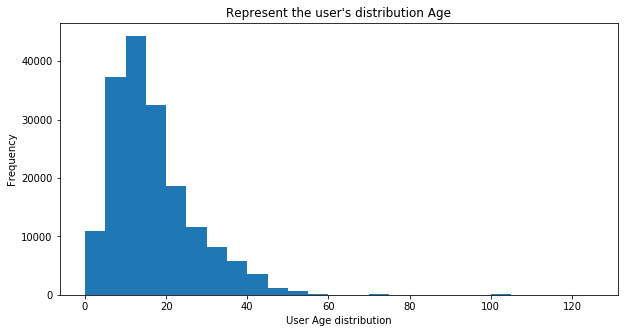

In [72]:
plt.figure(figsize = (10,5))
bins = np.arange(0, df_clean['age'].max()+5, 5)
plt.hist(data = df_clean, x = 'age', bins = bins)

plt.xlabel('User Age distribution')
plt.ylabel('Frequency')
plt.title("Represent the user's distribution Age")

plt.show()

Most users are young in age between 10 to 20. 

### 4. What is the distribution of the bike share users on all Trips?

Text(0.5,1,"User's distribution depending on being a part of the Trips Program")

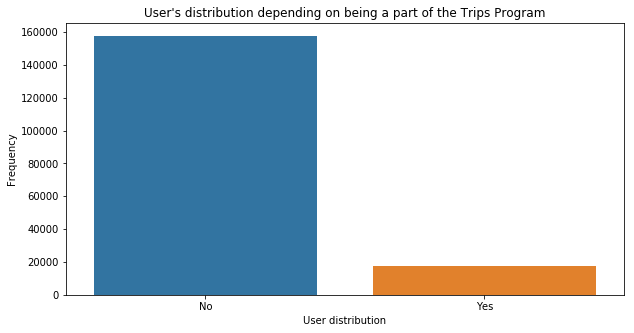

In [73]:
plt.figure(figsize = [10,5])

plot = sb.countplot(data=df_clean, x='bike_share_for_all_trip')

plt.xlabel('User distribution')
plt.ylabel('Frequency')
plt.title("User's distribution depending on being a part of the Trips Program")

From this visualization, majority of users are not part of the trip program. 

### 5. What is the distribution for user Type? 

Text(0.5,1,'Users distribution depending on their type')

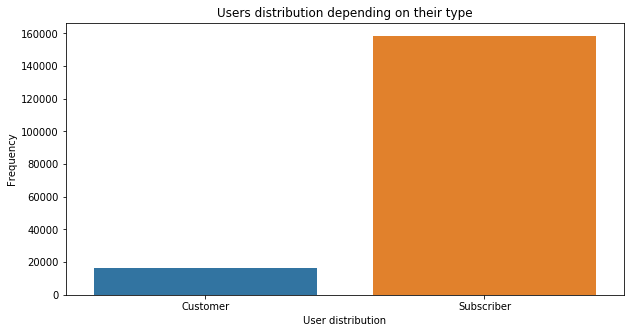

In [74]:
plt.figure(figsize = [10, 5]) 
plot = sb.countplot(data=df_clean, x='user_type')
plt.xlabel('User distribution')
plt.ylabel('Frequency')
plt.title("Users distribution depending on their type")


From this visualization we can conclude that the majority of bike users are subscribers. 

### 6. Using a pie chart to check the distribution for user-type

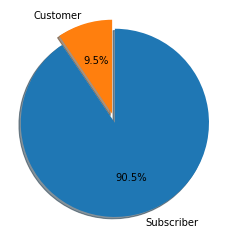

In [75]:
# plot a pie chart
user_category = df_clean['user_type'].value_counts()
plt.pie(user_category, explode =  (0, 0.1), labels = user_category.index, shadow = True, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.show()

Most users are a subscribers with 90.5% of total users. Customers represent 9.5% of the total users. 

### 7. What is the distribution of the trip duration in minutes? 

In [76]:
df_clean['duration_minutes'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_minutes, dtype: float64

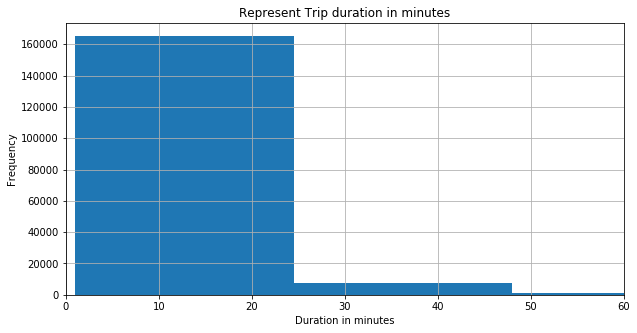

In [77]:
plt.figure(figsize = [10,5])
df_clean['duration_minutes'].hist(bins=60)
plt.xlim(0, 60)
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.title("Represent Trip duration in minutes")

plt.show()

Most users spend less than 30 minutes for a trip. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

#### Variable distribution
1. Most  users are subsribers and not customers. 
2. In terms of gender most users are males. 
3. Most users are not enrolled in the trip program according to the distribution of the bike share users on all Trips. 
4. Most users spend less than 30 minutes for a trip. 
5. The age distribution is left skewed. 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I found some tidiness and quality issues in the forgobike dataset and performed the following cleaning to get better analysis results.  

1. Dropped the missing values in start_station_id, start_station_name, end_station_id, end_station_name,member_birth_year         and member_gender              

2. Dropped start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude' columns which were not so signifacant in analysing the data.

3. Extracted new columns from the start time and end time columns. 

4. Dropped the start-time and end-time columns.

5. Converted the start-time and end-time data type to datetime from string.

6. Created a new column 'age' from member_birth_date.

7. Changed the age datatype from float to int. 


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### 9. How long is the duration of the trip for each gender in minutes? 

Text(0.5,1,'Duration of the trip for each gender in minutes')

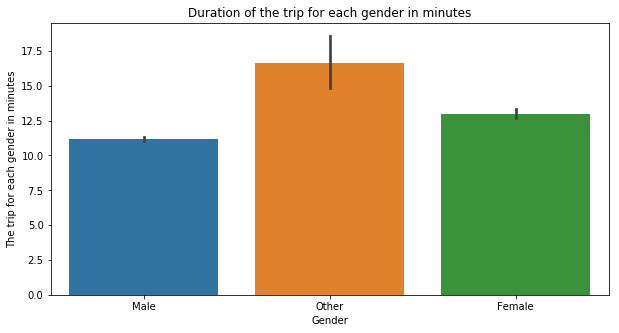

In [78]:
plt.figure(figsize = (10,5))

sb.barplot(data = df_clean, x = "member_gender", y = "duration_minutes")

plt.xlabel('Gender')

plt.ylabel('The trip for each gender in minutes')


plt.title("Duration of the trip for each gender in minutes")


Males take shorter trip time as compared to female and other. 

### 10. How long is the duration of the trip for each user-type in minutes. 

Text(0.5,1,'Duration of the trip for each user type in minutes')

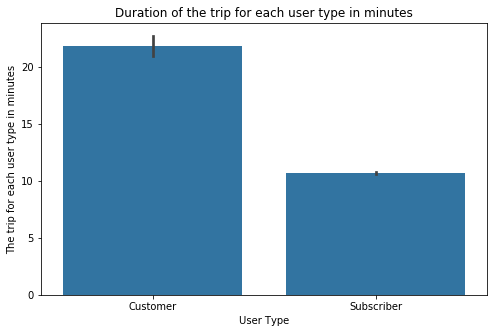

In [79]:
plt.figure(figsize = (8,5))
base_color = sb.color_palette()[0]
sb.barplot(data = df_clean, x = "user_type", y = "duration_minutes", color=base_color)

plt.xlabel('User Type')

plt.ylabel('The trip for each user type in minutes')


plt.title("Duration of the trip for each user type in minutes")

From this visualization we can conclude that Customers go on a longer trip than the subscriber user type. 

### 11. Check the user distribution depending on their age and gender? 

Text(0.5,1,'User distribution depending on their Age and gender ')

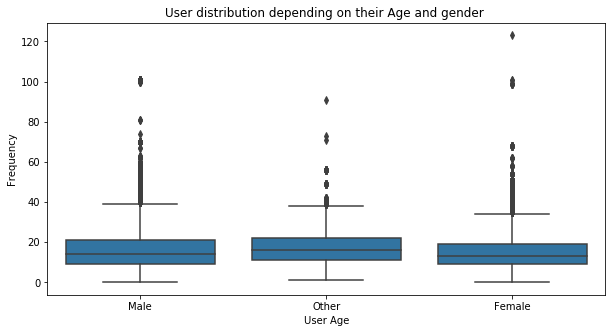

In [80]:
plt.figure(figsize = (10,5))

base_color = sb.color_palette()[0]

sb.boxplot(data=df_clean,x = "member_gender", y = "age", color=base_color)


plt.xlabel('User Age')

plt.ylabel('Frequency')


plt.title("User distribution depending on their Age and gender ")

Female are more than other and more than male. 

### 12. Check the user distribution depending on their age and user-type? 

Text(0.5,1,'User distribution depending on their Age and user type ')

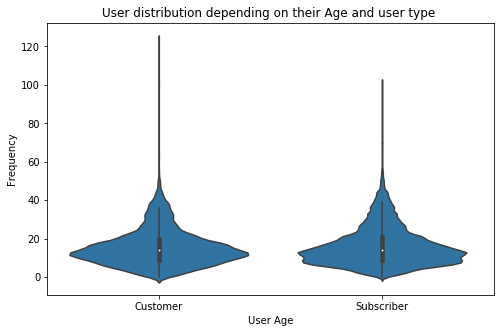

In [81]:
plt.figure(figsize = (8,5))

base_color = sb.color_palette()[0]

sb.violinplot(data=df_clean,x = "user_type", y = "age", color=base_color)


plt.xlabel('User Age')

plt.ylabel('Frequency')


plt.title("User distribution depending on their Age and user type ")

Customer is more than the subscriber. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The user-type customer go for longer trip compared to a subscriber. 

The trip duration decrease with an increase in age.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

When looking at the relationship between gender members and trip duration I was surprised to find that male had the lowest trip duration.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 13. Explore the relationship between start day of the week, gender and trip-durations (in minutes).

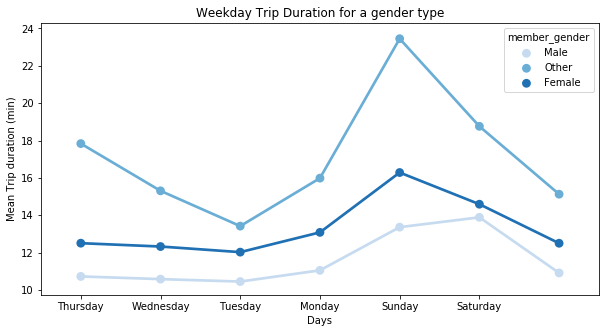

In [87]:

plt.figure(figsize=[10, 5])
sb.pointplot(data = df_clean, x = 'start_day_of_week', y = 'duration_minutes', hue = 'member_gender', palette = 'Blues', ci=None)
plt.title('Weekday Trip Duration for a gender type')
plt.ylabel('Mean Trip duration (min)')
plt.xlabel('Days')
plt.xticks(np.arange(0, 5 + 1, 1))
plt.show()

Males have the shortest bike trips. 

The number of trips start rising mostly on weekends. 

###  14. What is the correlation between specific numeric variables in the forgobike dataset?

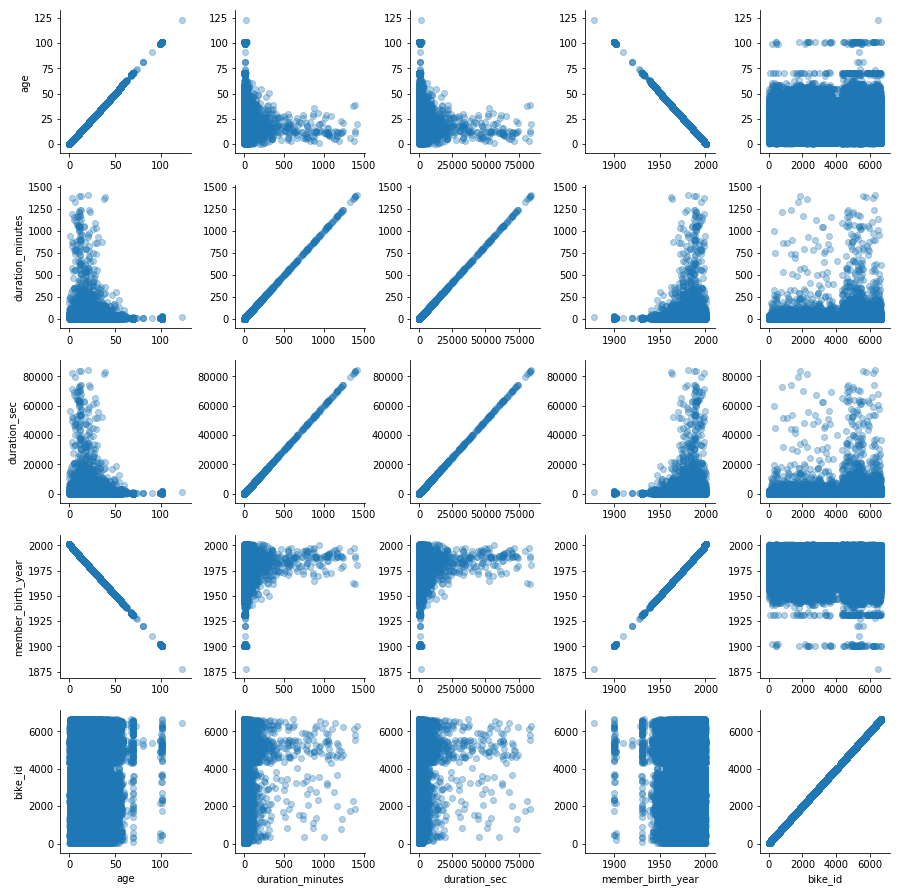

In [90]:
data = ['age', 'duration_minutes',"duration_sec", "member_birth_year", "bike_id"]
df = sb.PairGrid(data = df_clean, vars = data) ;
df.map(plt.scatter, alpha = 1/3);
plt.show()

There is a negative correlation between member birth year and age. 

There is no significant correlation for any variable with the bike-id. 

There is no correlation between in variable with time. 

### 15. Explore the relationship between age, gender and trip-durations (in minutes).

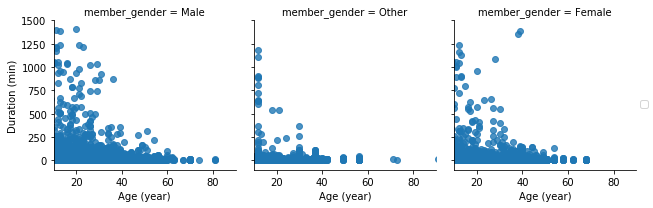

In [108]:
plt.figure(figsize=[10,5])
df = sb.FacetGrid(data = df_clean, col = 'member_gender', col_wrap = 3, aspect =1,  xlim = [10, 90], ylim = [-100, 1500])
df.map_dataframe(sb.regplot, 'age', 'duration_minutes', fit_reg=False)
df.set_axis_labels('Age (year)', 'Duration (min)')
df.add_legend()
plt.show()

Comparing the gender types as it relates to trip duration, the age 10 to 30 represents the group that does most of the rides. 
Males anf females appear to have the same trip average. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Males have shorter bike trips as compared to other gender. 

### Were there any interesting or surprising interactions between features?

There is a negative correletaion between member birth year and age. 

## Conclusions
Most of the users are male.

Most of the bike users are subscribers. 

The distribution of female depending on their age is more than Male. 

Most users are not part of the bike share program. 

From the age distribution most users are young. 

The trip duration mostly ranges below 30 minutes. 
